In [129]:
import numpy as np
import nltk
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus.reader import wordnet
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from collections import defaultdict
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganug\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ganug\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [130]:
trainingdatasets = pd.read_csv("train_data.csv")
testingdatasets = pd.read_csv("test_data.csv")
trainingdatasets

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill
...,...,...,...,...
60110,60110,UAERES18030,"In this position, you will utilize your progr...",Responsibility
60111,60111,GERRES3026,"In addition, this individual will be responsib...",Responsibility
60112,60112,INDSSK5492,Good problem solving skills.,SoftSkill
60113,60113,PHESSK15092,Good Excel knowledge .,SoftSkill


In [131]:
columnsofdataset = trainingdatasets.columns
newdata = trainingdatasets[columnsofdataset.drop(['Unnamed: 0'])]
newdata = newdata.dropna()
newdata.shape

(59002, 3)

In [132]:
Allsentence = newdata['Sentence_id'].astype(str)+' '+newdata['New_Sentence']
newdata['CombinedSentence']= Allsentence

In [133]:
newdata

,Sentence_id,New_Sentence,Type,CombinedSentence
0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility,GERRES15609 Author and/or Review architecture/...
1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility,PHERES15784 Should be able to develop custom d...
2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement,GERREQ10457 Experience in working crosslly wit...
3,GERSKL27235,"Previous business experience, including but no...",Skill,"GERSKL27235 Previous business experience, incl..."
4,HONSSK18415,Delivering fast and right the first time.,SoftSkill,HONSSK18415 Delivering fast and right the firs...
...,...,...,...,...
60110,UAERES18030,"In this position, you will utilize your progr...",Responsibility,"UAERES18030 In this position, you will utiliz..."
60111,GERRES3026,"In addition, this individual will be responsib...",Responsibility,"GERRES3026 In addition, this individual will b..."
60112,INDSSK5492,Good problem solving skills.,SoftSkill,INDSSK5492 Good problem solving skills.
60113,PHESSK15092,Good Excel knowledge .,SoftSkill,PHESSK15092 Good Excel knowledge .


In [134]:
newdata.iloc[[1],[3]]

,CombinedSentence
1,PHERES15784 Should be able to develop custom d...


In [135]:
newdata.size

236008

In [136]:
from sklearn.model_selection import train_test_split
trainingdataset, X = train_test_split(newdata, train_size=0.5)
dev_set, testingdataset = train_test_split(X, test_size=0.6)

In [137]:
trainingdataset

,Sentence_id,New_Sentence,Type,CombinedSentence
53834,UAESSK9337,Comunicaxe7xe3o clara (falada e escrita).,SoftSkill,UAESSK9337 Comunicaxe7xe3o clara (falada e es...
6973,COGSKL28444,C++ knowledge would be additional advantage.,Skill,COGSKL28444 C++ knowledge would be additional...
46818,UAEEDU19259,Delivering client engagements as part of a tea...,Education,UAEEDU19259 Delivering client engagements as p...
45404,COGSKL17217,"Ability to perform test planning, test design ...",Skill,"COGSKL17217 Ability to perform test planning, ..."
22912,COGREQ7289,his is a dummy block of text And this is repre...,Requirement,COGREQ7289 his is a dummy block of text And th...
...,...,...,...,...
34120,UAEEXP17916,Understand specifications conducts HLD design ...,Experience,UAEEXP17916 Understand specifications conducts...
14400,PHERES19878,"It is based in Atlanta, GA and reports to the...",Responsibility,"PHERES19878 It is based in Atlanta, GA and re..."
35862,UAEEXP32743,1 + years experience manufacturing environment.,Experience,UAEEXP32743 1 + years experience manufacturin...
41705,HONREQ4418,Experience in working in a Product Developmen...,Requirement,HONREQ4418 Experience in working in a Product...


In [138]:
testingdataset

,Sentence_id,New_Sentence,Type,CombinedSentence
36472,UAESSK6995,Excellent organizational and interpersonal sk...,SoftSkill,UAESSK6995 Excellent organizational and inter...
40023,UAESSK43504,Excellent attention to detail.,SoftSkill,UAESSK43504 Excellent attention to detail.
21715,GERRES26674,Develop and update automation systems and com...,Responsibility,GERRES26674 Develop and update automation sys...
52406,HONRES8669,Support in annual Business Planning cycles set...,Responsibility,HONRES8669 Support in annual Business Planning...
6363,GERREQ48850,Ability to use judgment and logic to understan...,Requirement,GERREQ48850 Ability to use judgment and logic ...
...,...,...,...,...
21244,COGEXP8603,Total experience of 5 to 8 years .,Experience,COGEXP8603 Total experience of 5 to 8 years .
22311,PHERES20280,Participate in the progress review meetings an...,Responsibility,PHERES20280 Participate in the progress review...
19191,COGRES40713,Deriving transfer functions and noise analysis...,Responsibility,COGRES40713 Deriving transfer functions and no...
58180,COGEXP1058,Minimum 3 years of experience in industrial au...,Experience,COGEXP1058 Minimum 3 years of experience in in...


In [139]:
dev_set

,Sentence_id,New_Sentence,Type,CombinedSentence
22290,GEREXP18399,Minimum 12 years experience selling similar Se...,Experience,GEREXP18399 Minimum 12 years experience sellin...
49363,PHERES14671,Reporting of all testing related findings.,Responsibility,PHERES14671 Reporting of all testing related ...
58695,COGSSK18562,Cyber design at the component level.,SoftSkill,COGSSK18562 Cyber design at the component level.
58783,COGEXP5165,6+ years of experience in Software and/or Avi...,Experience,COGEXP5165 6+ years of experience in Software...
42337,UAESSK35821,his is a dummy block of text And this is repre...,SoftSkill,UAESSK35821 his is a dummy block of text And t...
...,...,...,...,...
19987,INDREQ22531,Ability to operate in a highly matrixed envir...,Requirement,INDREQ22531 Ability to operate in a highly ma...
36143,UAEEXP30491,"3 + years of Product Owner, Product Manager e...",Experience,"UAEEXP30491 3 + years of Product Owner, Produ..."
19828,INDRES9786,Should be familiar with using various Configu...,Responsibility,INDRES9786 Should be familiar with using vario...
34888,PHEEXP38598,5 + Years in Software Development specific to...,Experience,PHEEXP38598 5 + Years in Software Development...


In [140]:
type=[]
for a in trainingdataset['Type']:
    if a not in type:
        type.append(a)

In [141]:
l=1
for m in type:
    print([l],m)
    l+=1

[1] SoftSkill
[2] Skill
[3] Education
[4] Requirement
[5] Responsibility
[6] Experience


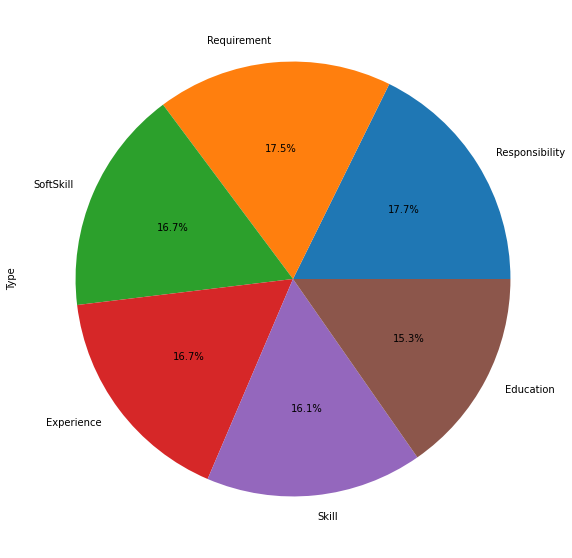

In [142]:
plt.figure(figsize=(20,10))
trainingdataset['Type'].value_counts().apply(np.log).plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [143]:
A=trainingdataset["Type"].values
Counter(A)

Counter({'SoftSkill': 4648,
         'Skill': 3434,
         'Education': 2287,
         'Requirement': 6924,
         'Responsibility': 7654,
         'Experience': 4554})

In [144]:
A=trainingdataset["Type"].value_counts()
count=pd.DataFrame(A)
count['Type'].values.sum()

29501

In [145]:
StopWords = nltk.corpus.stopwords.words('english')

In [146]:
import re
alist=""; counteachword = {}; characteristics=[]; listofthewords=[]
combinedsentence = str(newdata['CombinedSentence'])
nonalphanumeric=re.sub(r'[^w'+alist+']', ' ',combinedsentence)
for ch in range(ord('a'), ord('z')+1):
      characteristics.append(chr(ch))
for cha in range(ord('A'), ord('Z')+1):
      characteristics.append(chr(cha))
for G in type:
    for i in trainingdataset.query('Type==@G')['CombinedSentence']:
        C=word_tokenize(str(i))
        for j in C:
            if j not in StopWords and j not in nonalphanumeric and j not in characteristics and len(j)>=3:
                if j[0] in nonalphanumeric and j[-1] in nonalphanumeric:
                    listofthewords.append(j[1:-1].lower())
                elif j[0] in nonalphanumeric and j[-1] not in nonalphanumeric:
                    listofthewords.append(j[1:].lower())
                elif j[-1] in nonalphanumeric and j[0] not in nonalphanumeric:
                    listofthewords.append(j[:-1].lower())
                else:
                    listofthewords.append(j.lower())
    counteachword[G]=Counter(listofthewords)

In [147]:
counteachword = pd.DataFrame(counteachword)
counteachword = counteachword.fillna(0)
counteachword

,SoftSkill,Skill,Education,Requirement,Responsibility,Experience
uaessk9337,1.0,1.0,1.0,1.0,1.0,1
comunicaxe7xe3o,2.0,2.0,2.0,2.0,2.0,2
clara,1.0,1.0,1.0,1.0,1.0,1
falada,1.0,1.0,1.0,1.0,1.0,1
escrita,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...
gerexp17530,0.0,0.0,0.0,0.0,0.0,1
4years,0.0,0.0,0.0,0.0,0.0,1
uaeexp17916,0.0,0.0,0.0,0.0,0.0,1
hld,0.0,0.0,0.0,0.0,0.0,1


In [148]:
counteachword=counteachword.eval('RowSum= Responsibility + Requirement + Skill + SoftSkill + Education + Experience')
print(counteachword)

                 SoftSkill  Skill  Education  Requirement  Responsibility  \
uaessk9337             1.0    1.0        1.0          1.0             1.0   
comunicaxe7xe3o        2.0    2.0        2.0          2.0             2.0   
clara                  1.0    1.0        1.0          1.0             1.0   
falada                 1.0    1.0        1.0          1.0             1.0   
escrita                1.0    1.0        1.0          1.0             1.0   
...                    ...    ...        ...          ...             ...   
gerexp17530            0.0    0.0        0.0          0.0             0.0   
4years                 0.0    0.0        0.0          0.0             0.0   
uaeexp17916            0.0    0.0        0.0          0.0             0.0   
hld                    0.0    0.0        0.0          0.0             0.0   
uaeexp32743            0.0    0.0        0.0          0.0             0.0   

                 Experience  RowSum  
uaessk9337                1     6.0  

In [149]:
NoofWords=counteachword.sum()
counteachword.loc['NumberofWords'] = NoofWords
counteachword

,SoftSkill,Skill,Education,Requirement,Responsibility,Experience,RowSum
uaessk9337,1.0,1.0,1.0,1.0,1.0,1.0,6.0
comunicaxe7xe3o,2.0,2.0,2.0,2.0,2.0,2.0,12.0
clara,1.0,1.0,1.0,1.0,1.0,1.0,6.0
falada,1.0,1.0,1.0,1.0,1.0,1.0,6.0
escrita,1.0,1.0,1.0,1.0,1.0,1.0,6.0
...,...,...,...,...,...,...,...
4years,0.0,0.0,0.0,0.0,0.0,1.0,1.0
uaeexp17916,0.0,0.0,0.0,0.0,0.0,1.0,1.0
hld,0.0,0.0,0.0,0.0,0.0,1.0,1.0
uaeexp32743,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [150]:
data=counteachword.loc['the','RowSum']
data/counteachword['RowSum'].values.sum()

0.0009015056498672178

In [151]:
def condpro(probabilityofword, responsibility, smoothing, data):
    addition= smoothing*len(data[responsibility])
    denominator= data.loc['NumberofWords',responsibility]+ addition
    if probabilityofword in data.index and responsibility in data.columns:
        numerator= data.loc[probabilityofword, responsibility]+smoothing
        return(numerator/denominator)
    elif responsibility in data.columns and probabilityofword not in data.index:
        numerator= smoothing
        return(numerator/denominator)

condpro('the', 'Responsibility', 0, counteachword)

0.002166989110140495

In [152]:
condpro('the','Skill',0,counteachword)

0.0010307829264864358

In [153]:
condpro('the','Requirement',0,counteachword)

0.0020248038471273096

In [154]:
condpro('the','Education',0,counteachword)

0.0009901827007836935

In [155]:
condpro('the','Experience',0,counteachword)

0.001863903344808025

In [156]:
condpro('the','SoftSkill',0,counteachword)

0.0012655024044545685

In [157]:
condpro('shfb','Responsibility',1,counteachword)

3.5128764486224256e-06

In [158]:
condpro('shfb','Skill',1,counteachword)

8.93160179346564e-06

In [159]:
condpro('shfb','Requirement',1,counteachword)

5.1514527096641255e-06

In [160]:
condpro('shfb','Education',1,counteachword)

7.648417542410475e-06

In [161]:
condpro('shfb','Experience',1,counteachword)

3.0143543554406083e-06

In [162]:
condpro('shfb','SoftSkill',1,counteachword)

1.1977195419920472e-05

In [163]:
def cateog(A):
    categ=counteachword.loc['NumberofWords',A]/counteachword.loc['NumberofWords','RowSum']
    return categ

In [164]:
probabilityofword= counteachword.iloc[:-1,:-1]

for i in probabilityofword.index:
    for j in probabilityofword.columns:
        probabilityofword.loc[i,j]= condpro(i,j,1,counteachword)

probabilityofword

,SoftSkill,Skill,Education,Requirement,Responsibility,Experience
uaessk9337,0.000024,0.000018,0.000015,0.000010,0.000007,0.000006
comunicaxe7xe3o,0.000036,0.000027,0.000023,0.000015,0.000011,0.000009
clara,0.000024,0.000018,0.000015,0.000010,0.000007,0.000006
falada,0.000024,0.000018,0.000015,0.000010,0.000007,0.000006
escrita,0.000024,0.000018,0.000015,0.000010,0.000007,0.000006
...,...,...,...,...,...,...
gerexp17530,0.000012,0.000009,0.000008,0.000005,0.000004,0.000006
4years,0.000012,0.000009,0.000008,0.000005,0.000004,0.000006
uaeexp17916,0.000012,0.000009,0.000008,0.000005,0.000004,0.000006
hld,0.000012,0.000009,0.000008,0.000005,0.000004,0.000006


In [165]:
def NaiveBayes(category, word):
    word= 'YOU MUST HAVEBachelors degree  in Engineering'
    A_list=[]
    for a in list(word.split(" ")):
        C=word_tokenize(a)
        for j in C:
            if j not in StopWords and j not in nonalphanumeric and j not in characteristics and len(j)>=3:
                if j[0] in nonalphanumeric and j[-1] in nonalphanumeric:
                    A_list.append(j[1:-1].lower())
                elif j[0] in nonalphanumeric and j[-1] not in nonalphanumeric:
                    A_list.append(j[1:].lower())
                elif j[-1] in nonalphanumeric and j[0] not in nonalphanumeric:
                    A_list.append(j[:-1].lower())
                else:
                    A_list.append(j.lower())
    proba=1
    for m in A_list:
        proba=proba*condpro(m, category,0,counteachword)
    numerator = proba*cateog(A)
    denominator=0
    for k in type:
        crossproduct=1
        for l in A_list:
            crossproduct=crossproduct*condpro(l,k,0,counteachword)
        crossproduct=crossproduct*cateog(A)
        denominator=denominator+crossproduct
        
    return(numerator/denominator)

In [167]:
for num in probabilityofword.columns:
    print("In the catergory \'",num,"\' the top 10 words are:",probabilityofword[num].nlargest(n=10).index.values)
    print()

In the catergory ' SoftSkill ' the top 10 words are: ['skills' 'ability' 'communication' 'strong' 'excellent' 'ork' 'team'
 'ritten' 'management' 'good']

In the catergory ' Skill ' the top 10 words are: ['skills' 'experience' 'ability' 'strong' 'communication' 'knowledge'
 'management' 'excellent' 'good' 'ork']

In the catergory ' Education ' the top 10 words are: ['skills' 'experience' 'degree' 'ability' 'engineering' 'strong'
 'management' 'communication' 'knowledge' 'business']

In the catergory ' Requirement ' the top 10 words are: ['experience' 'ability' 'skills' 'degree' 'knowledge' 'engineering'
 'strong' 'management' 'business' 'ork']

In the catergory ' Responsibility ' the top 10 words are: ['experience' 'ability' 'skills' 'business' 'management' 'engineering'
 'degree' 'knowledge' 'team' 'ork']

In the catergory ' Experience ' the top 10 words are: ['experience' 'years' 'skills' 'ability' 'management' 'business'
 'engineering' 'degree' 'knowledge' 'team']



# References:

1) https://stackoverflow.com/questions/46655202/probability-of-a-pandas-value
2) https://stackoverflow.com/questions/33468976/pandas-conditional-probability-of-a-given-specific-b
3) https://medium.com/@craxtarun/text-classification-using-naive-bayes-classifier-818885830f51
4) https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.06-Bar-Charts-and-Pie-Charts/ 
5) https://stackoverflow.com/questions/55360559/check-number-of-stopwords-in-a-text-column-pandas